#### Load library

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (Choose medium data)

### Small data

In [25]:
# Small dataset
# # Read the dataset from a file on studres.
# data = pd.read_csv("Combined_Flights_small.csv")

### Medium data

In [26]:
# Medium dataset
# med_data_1 = pd.read_csv("D:\qq_file\ID5059\coursework1/Combined_Flights_med_2018.csv")
# med_data_2 = pd.read_csv("D:\qq_file\ID5059\coursework1/Combined_Flights_med_2019.csv")
# med_data_3 = pd.read_csv("D:\qq_file\ID5059\coursework1/Combined_Flights_med_2020.csv")
# med_data_4 = pd.read_csv("D:\qq_file\ID5059\coursework1/Combined_Flights_med_2021.csv")
# med_data_5 = pd.read_csv("D:\qq_file\ID5059\coursework1/Combined_Flights_med_2022.csv")

# Extract data from CS lab
med_data_1 = pd.read_csv("/cs/datasets/ID5059/Coursework1/2_medium/Combined_Flights_med_2018.csv")
med_data_2 = pd.read_csv("/cs/datasets/ID5059/Coursework1/2_medium/Combined_Flights_med_2019.csv")
med_data_3 = pd.read_csv("/cs/datasets/ID5059/Coursework1/2_medium/Combined_Flights_med_2020.csv")
med_data_4 = pd.read_csv("/cs/datasets/ID5059/Coursework1/2_medium/Combined_Flights_med_2021.csv")
med_data_5 = pd.read_csv("/cs/datasets/ID5059/Coursework1/2_medium/Combined_Flights_med_2022.csv")

data = pd.concat([med_data_1, med_data_2, med_data_3, med_data_4, med_data_5], ignore_index=True)

##

In [27]:
# Display data
# Clear the maximum number of columns to be displayed, so that all will be visible.
pd.set_option('display.max_columns', None)

display(data)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrDel15,ArrTimeBlk,DistanceGroup,Disruption
0,2018-07-13,United Air Lines Inc.,LAX,ORD,0,0,1845,231,1744,2018,3,7,13,5,UA,UA,19977,UA,1451,UA,19977,UA,N73860,1451,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,13930,1393006,30977,"Chicago, IL",IL,17,Illinois,41,1800-1859,36,0.0,0001-0559,7,0.0
1,2018-06-26,Mesa Airlines Inc.,CRP,IAH,0,0,1757,60,201,2018,2,6,26,2,UA,UA_CODESHARE,19977,UA,6216,YV,20378,YV,N86312,6216,11140,1114008,31140,"Corpus Christi, TX",TX,48,Texas,74,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,1700-1759,1857,0.0,1800-1859,1,0.0
2,2018-07-03,Southwest Airlines Co.,ECP,HOU,0,0,945,105,571,2018,3,7,3,2,WN,WN,19393,WN,1154,WN,19393,WN,N744SW,1154,11481,1148102,31481,"Panama City, FL",FL,12,Florida,33,12191,1219102,31453,"Houston, TX",TX,48,Texas,74,0900-0959,1130,0.0,1100-1159,3,0.0
3,2018-10-28,United Air Lines Inc.,LAS,IAH,0,0,1015,171,1222,2018,4,10,28,7,UA,UA,19977,UA,1720,UA,19977,UA,N37474,1720,12889,1288903,32211,"Las Vegas, NV",NV,32,Nevada,85,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,1000-1059,1506,0.0,1500-1559,5,0.0
4,2018-11-01,ExpressJet Airlines Inc.,IAH,TUL,0,0,1856,90,429,2018,4,11,1,4,UA,UA_CODESHARE,19977,UA,4426,EV,20366,EV,N13975,4426,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,15370,1537002,34653,"Tulsa, OK",OK,40,Oklahoma,73,1800-1859,2026,0.0,2000-2059,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291930,2022-02-28,Delta Air Lines Inc.,DCA,ATL,0,0,1705,123,547,2022,1,2,28,1,DL,DL,19790,DL,464,DL,19790,DL,N356NW,464,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,1700-1759,1908,1.0,1900-1959,3,1.0
291931,2022-05-09,United Air Lines Inc.,DFW,EWR,0,0,800,206,1372,2022,2,5,9,1,UA,UA,19977,UA,659,UA,19977,UA,N54711,659,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,0800-0859,1226,0.0,1200-1259,6,0.0
291932,2022-06-29,Delta Air Lines Inc.,ATL,CLT,0,0,1513,78,226,2022,2,6,29,3,DL,DL,19790,DL,1062,DL,19790,DL,N919AT,1062,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,1500-1559,1631,1.0,1600-1659,1,1.0
291933,2022-01-02,American Airlines Inc.,TPA,ORD,0,0,1435,185,1011,2022,1,1,2,7,AA,AA,19805,AA,644,AA,19805,AA,N9013A,644,15304,1530402,33195,"Tampa, FL",FL,12,Florida,33,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,1400-1459,1640,1.0,1600-1659,5,1.0


# Select  Atrribuates

In [28]:
# Select 9 attribuates
flights = data[['Year', 'Quarter', 'Month', 'DayOfWeek',  'Marketing_Airline_Network', 'Origin',  'Dest', 'Operated_or_Branded_Code_Share_Partners', 'CRSDepTime','Disruption']]
flights.head()

,Year,Quarter,Month,DayOfWeek,Marketing_Airline_Network,Origin,Dest,Operated_or_Branded_Code_Share_Partners,CRSDepTime,Disruption
0,2018,3,7,5,UA,LAX,ORD,UA,1845,0.0
1,2018,2,6,2,UA,CRP,IAH,UA_CODESHARE,1757,0.0
2,2018,3,7,2,WN,ECP,HOU,WN,945,0.0
3,2018,4,10,7,UA,LAS,IAH,UA,1015,0.0
4,2018,4,11,4,UA,IAH,TUL,UA_CODESHARE,1856,0.0


### Crate test set, training set

In [29]:
from sklearn.model_selection import train_test_split

# Classify data into labels and features
X = flights.drop('Disruption', axis=1)  # Features
y = flights['Disruption']  # Label

# For null value filling 0, 0 - no disruption
y = y.fillna(0)

# # Split test data
# X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=5059, stratify=y) # stratify = y indicating stratified sampling by label y

# # Split rest data into valid and train data
# X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=5059, stratify=y_temp)
# # 60% train data, 20% valid data, 20% test data

# Split test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5059, stratify=y) # stratify = y indicating stratified sampling by label y

In [30]:
# Check stratified outcomes in test set
y_test.value_counts() /len(y_test)
# Indicates a ratio of 80% and 20%

Disruption
0.0    0.79826
1.0    0.20174
Name: count, dtype: float64

In [31]:
# Check stratified outcomes in training set
y_train.value_counts() /len(y_train)

Disruption
0.0    0.798264
1.0    0.201736
Name: count, dtype: float64

### Check attributes

In [32]:
# Check attributes type
flights.info()
#Check which attribute has null value
na_rows = flights.isna().sum(axis=0)
na_rows
# For medium data only 10 null value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291935 entries, 0 to 291934
Data columns (total 10 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Year                                     291935 non-null  int64  
 1   Quarter                                  291935 non-null  int64  
 2   Month                                    291935 non-null  int64  
 3   DayOfWeek                                291935 non-null  int64  
 4   Marketing_Airline_Network                291935 non-null  object 
 5   Origin                                   291935 non-null  object 
 6   Dest                                     291935 non-null  object 
 7   Operated_or_Branded_Code_Share_Partners  291935 non-null  object 
 8   CRSDepTime                               291935 non-null  int64  
 9   Disruption                               291925 non-null  float64
dtypes: float64(1), int64(5), object(

Year                                        0
Quarter                                     0
Month                                       0
DayOfWeek                                   0
Marketing_Airline_Network                   0
Origin                                      0
Dest                                        0
Operated_or_Branded_Code_Share_Partners     0
CRSDepTime                                  0
Disruption                                 10
dtype: int64

## Visualise attribuates

### Visualise the impact of COVID-19
2020,2021 are COVID-19 periods with lower flight delays than non-COVID periods

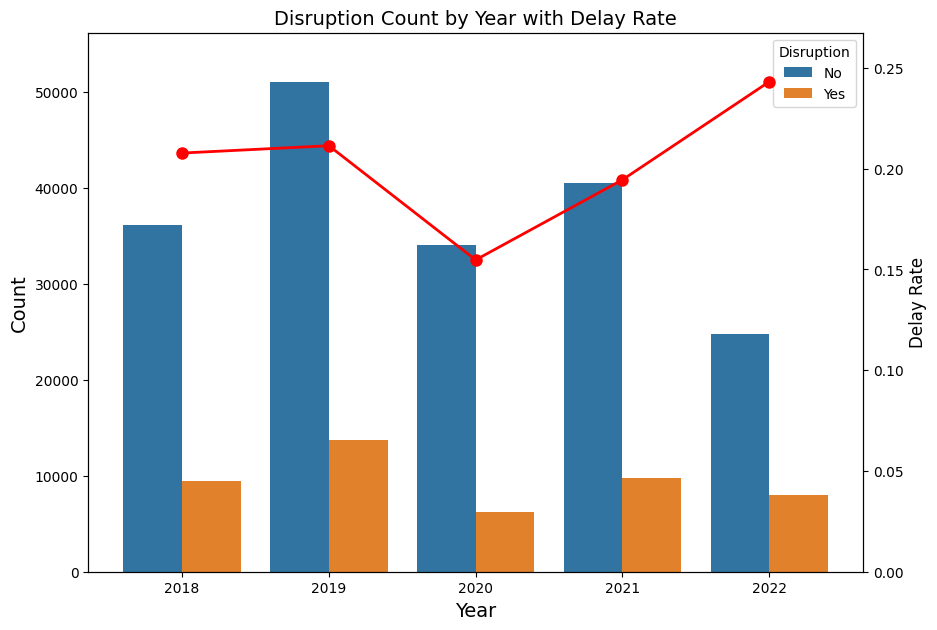

In [33]:
train_data_combined= X_train.copy()
train_data_combined['Disruption'] = y_train.values

# Year should be category
train_data_combined['Year'] = train_data_combined['Year'].astype(str)

# Calculation of delays per year
disruption_counts = train_data_combined.groupby('Year')['Disruption'].value_counts().unstack()

# calculate rate
disruption_rate = disruption_counts[1] / (disruption_counts[0] + disruption_counts[1])

# Plot bar chart
plt.figure(figsize=(10, 7))
ax1 = sns.countplot(x='Year', hue='Disruption', data=train_data_combined, order=sorted(train_data_combined['Year'].unique()))
ax1.set_title('Disruption Count by Year with Delay Rate', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
plt.legend(title='Disruption', labels=['No', 'Yes'], fontsize=10)

# Make sure x start form 0
ax1.set_ylim(0, disruption_counts.max().max() + disruption_counts.max().max() * 0.1)

# Add line graph to show delay flctuations
ax2 = ax1.twinx()
ax2.plot(sorted(train_data_combined['Year'].unique()), disruption_rate.values, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
ax2.set_ylabel('Delay Rate', fontsize=12)

# Ensure the years of line graphs are sorted by year
ax2.set_ylim(0, disruption_rate.max() + disruption_rate.max() * 0.1)

plt.show()

#### Quarterly impact on flights delays

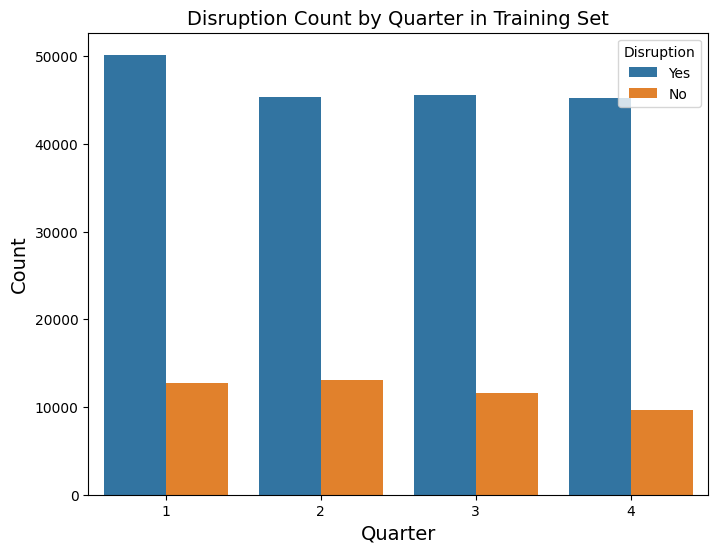

In [34]:
# Plotting the counts of delays and non-delays in each quater
plt.figure(figsize=(8, 6))
sns.countplot(x='Quarter', hue='Disruption', data=train_data_combined)
plt.title('Disruption Count by Quarter in Training Set', fontsize = 14)
plt.xlabel('Quarter', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(title='Disruption', labels=['Yes', 'No'])
plt.show()

#### Impact of the month on flights delays

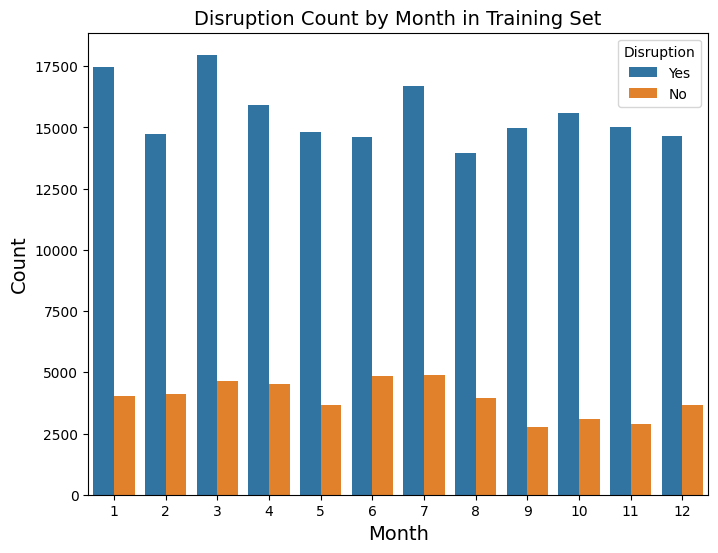

In [35]:
# Plotting the counts of delays and non-delays in each month
plt.figure(figsize=(8, 6))
sns.countplot(x='Month', hue='Disruption', data=train_data_combined)
plt.title('Disruption Count by Month in Training Set', fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(title='Disruption', labels=['Yes', 'No'])
plt.show()

#### Impact of the day of week on flights delays

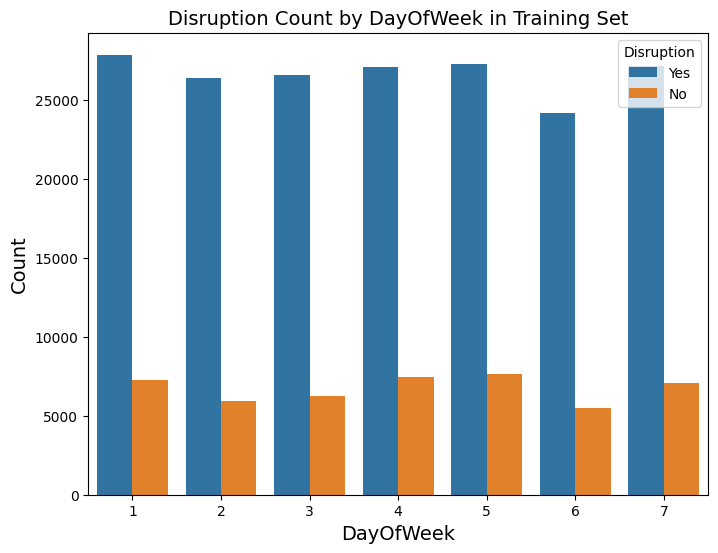

In [36]:
# Plotting the counts of delays and non-delays in each day of week
plt.figure(figsize=(8, 6))
sns.countplot(x='DayOfWeek', hue='Disruption', data=train_data_combined)
plt.title('Disruption Count by DayOfWeek in Training Set', fontsize = 14)
plt.xlabel('DayOfWeek', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(title='Disruption', labels=['Yes', 'No'])
plt.show()

#### Imapct of operating companies on flights delays

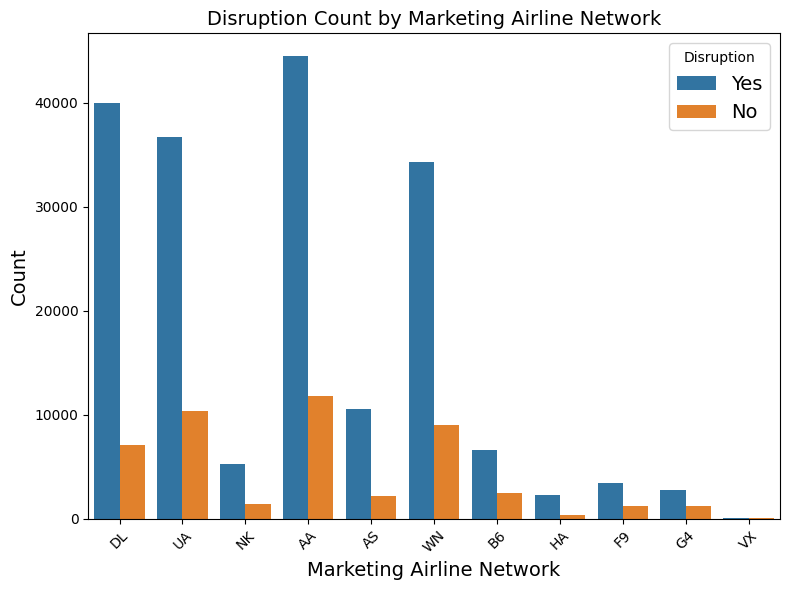

In [37]:
# Plotting the counts of delays and non-delays in each day of Marketing_Airline_Network
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Marketing_Airline_Network', hue='Disruption', data=train_data_combined)
ax.set_title('Disruption Count by Marketing Airline Network', fontsize=14)
ax.set_xlabel('Marketing Airline Network', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Disruption', labels=['Yes', 'No'], fontsize=14)
plt.tight_layout()  
plt.show()

#### Impact of departure airports on flight delays

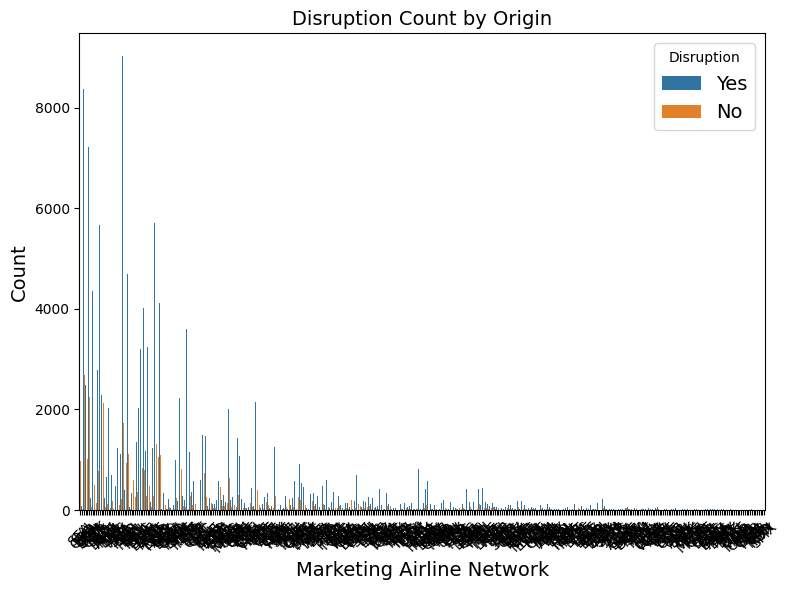

In [38]:
# Plotting the counts of delays and non-delays in each day of Origin
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Origin', hue='Disruption', data=train_data_combined)
ax.set_title('Disruption Count by Origin', fontsize=14)
ax.set_xlabel('Marketing Airline Network', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Disruption', labels=['Yes', 'No'], fontsize=14)
plt.tight_layout()  
plt.show()

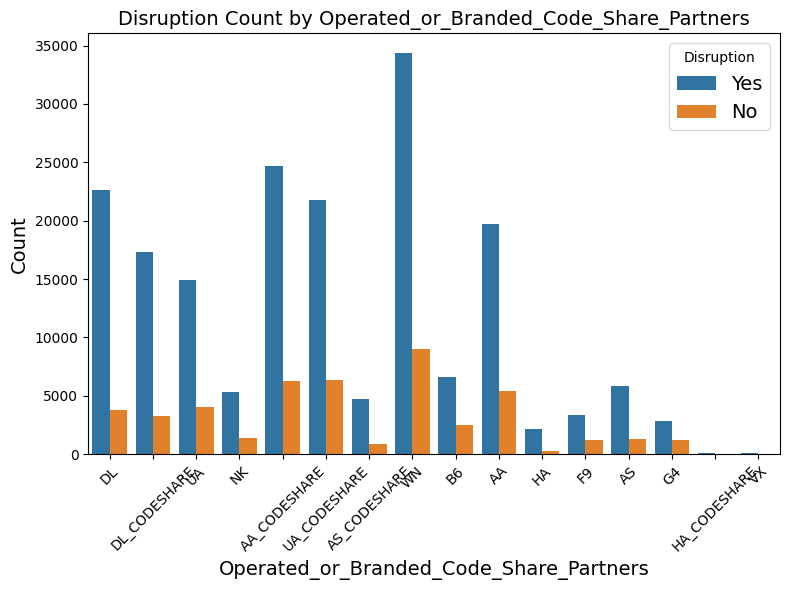

In [39]:
# Plotting the counts of delays and non-delays in each day of Operated_or_Branded_Code_Share_Partners
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Operated_or_Branded_Code_Share_Partners', hue='Disruption', data=train_data_combined)
ax.set_title('Disruption Count by Operated_or_Branded_Code_Share_Partners', fontsize=14)
ax.set_xlabel('Operated_or_Branded_Code_Share_Partners', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Disruption', labels=['Yes', 'No'], fontsize=14)
plt.tight_layout()  
plt.show()

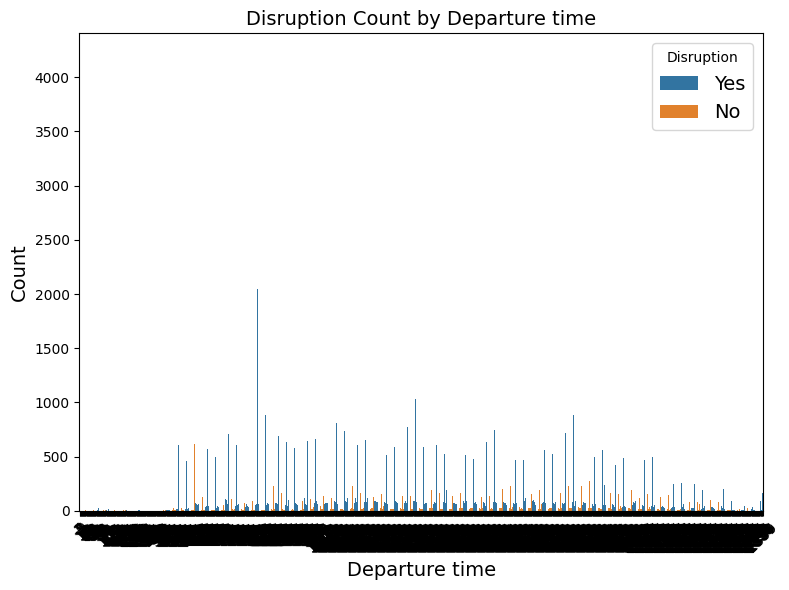

In [40]:
# Plotting the counts of delays and non-delays in each day of departure time
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CRSDepTime', hue='Disruption', data=train_data_combined)
ax.set_title('Disruption Count by Departure time', fontsize=14)
ax.set_xlabel('Departure time', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Disruption', labels=['Yes', 'No'], fontsize=14)
plt.tight_layout()  
plt.show()

## Pipeline

### Customised time converter
1.Convert the CRSDepTime to the number of minutes that have elapsed since the zero hour

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

# Customised time converter
class TimeConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X, y=None):
        # Convert CRSDepTime  into minutes 
        hours = X // 100
        minutes = X % 100
        return np.array(hours * 60 + minutes).reshape(-1, 1)  # output is 2 dimensional array


### 2 Define year conversion
Split years into those during the epidemic--1 , those not during the epidemic--0
2020, 2021 is 1

In [42]:
from sklearn.preprocessing import FunctionTransformer

# Define a function that converts the year into a characteristic of whether it is in an outbreak
def pandemic_period(years):
    return np.where(np.isin(years, [2020, 2021]), 1, 0).reshape(-1, 1)

# Create Converter
pandemic_transformer = FunctionTransformer(pandemic_period)

### Application pipelines

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Define the features to be converted
# Onehotcode
categorical_attributes = ['Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'Origin', 'Dest', 'Year', 'Month', 'DayOfWeek']
# Scaling
numerical_attributes = ['CRSDepTime'] 

one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

categorical_attributes = ['Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'Origin', 'Dest', 'Month', 'DayOfWeek']

# Incorporate one-hot encode and standardization into pipeline
full_pipeline = ColumnTransformer([
    ("numerical", Pipeline([
        ('time_converter', TimeConverter()),  
        ('scaler', StandardScaler())  # Normalisation of depareture time
    ]), numerical_attributes),
    ("categorical", one_hot_encoder, categorical_attributes),
    ("pandemic", pandemic_transformer, ["Year"]),  # Convert Year
])



In [44]:
# Fitting the preprocessing pipeline to training data
full_pipeline.fit(X_train)

# Apply preprocessing pipeline to training set, test set and validation set
X_train_prepared = full_pipeline.transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
# X_valid_prepared = full_pipeline.transform(X_valid)

### Binary classification

In [45]:
# # Predicting the probability of no delay
# y_train_0 = (y_train == 0)
# y_valid_0 = (y_valid == 0)
# y_test_0 = (y_test == 0)
# y_train_0

# Predicting the probability of no delay
y_train_0 = (y_train == 0)
# y_valid_0 = (y_valid == 0)
y_test_0 = (y_test == 0)
y_train_0

100874     True
225888     True
6262       True
66186      True
89078      True
          ...  
263180    False
91510     False
242758     True
267848    False
26960      True
Name: Disruption, Length: 233548, dtype: bool

## 1 -- Decision tree model

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

tree_classifier = DecisionTreeClassifier(random_state=5059)
tree_classifier.fit(X_train_prepared, y_train_0)

DecisionTreeClassifier(random_state=5059)

In [47]:
# Predicate
y_pred = tree_classifier.predict(X_train_prepared)

# Caculate precision recall f1 score
precision = precision_score(y_train_0, y_pred)
recall = recall_score(y_train_0, y_pred)
f1 = f1_score(y_train_0, y_pred)

print(f"Decison tree Precision: {precision}")
print(f"Decison tree Recall: {recall}")
print(f"Decision tree F1 Score: {f1}")

Decison tree Precision: 0.9999676894743077
Decison tree Recall: 0.9960253817725403
Decision tree F1 Score: 0.9979926423759375


#### Decision tree model - confusion_matrix

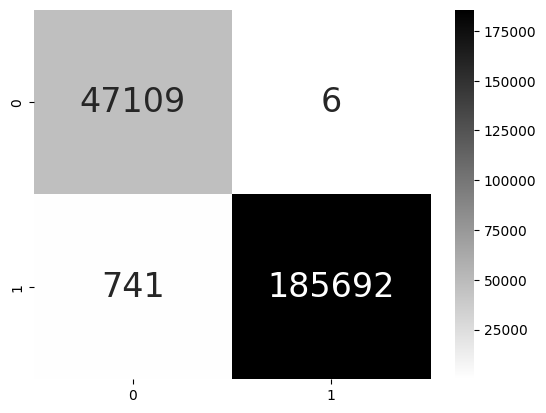

In [48]:
from sklearn.metrics import confusion_matrix

# Fit model
tree_classifier.fit(X_train_prepared, y_train_0)

# Calculate confusion matrix
y_train_predictions = tree_classifier.predict(X_train_prepared)
matrix = confusion_matrix(y_train_0, y_train_predictions)

# plot decision tree confusion matrix
plt.figure()
sns.heatmap(matrix, annot=True, fmt='d', cmap='binary', annot_kws={"fontsize":24})
plt.show()


## 2 -- Random forest model

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(n_estimators=100, random_state=5059)

forest_classifier.fit(X_train_prepared, y_train_0)

RandomForestClassifier(random_state=5059)

In [50]:
# Making precision for model
y_pred = forest_classifier.predict(X_train_prepared)

# Caculate precision recall f1 score
precision = precision_score(y_train_0, y_pred)
recall = recall_score(y_train_0, y_pred)
f1 = f1_score(y_train_0, y_pred)

print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest F1 Score: {f1}")

Random Forest Precision: 0.9966458032418553
Random Forest Recall: 0.999302698556586
Random Forest F1 Score: 0.9979724825437979


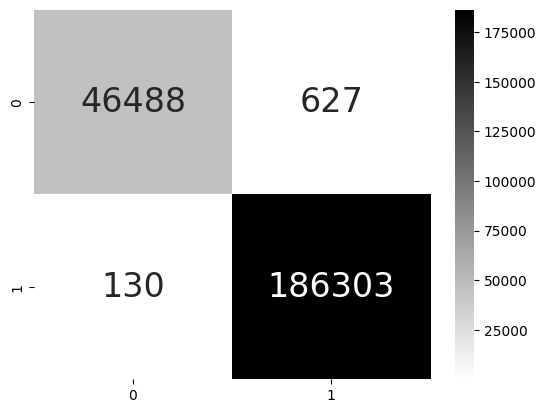

In [51]:
# Fit model
forest_classifier.fit(X_train_prepared, y_train_0)

# Use training set calculate confusion matrix
y_train_predictions = forest_classifier.predict(X_train_prepared)

# calculate confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train_0, y_train_predictions)


plt.figure()
sns.heatmap(matrix, annot=True, fmt='d', cmap='binary', annot_kws={"fontsize":24})
plt.show()


## 3 -- Logistic Regression model

In [52]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
logistic_regression_model = LogisticRegression(random_state=5059, class_weight='balanced')

# use y_train_0 to train model
logistic_regression_model.fit(X_train_prepared, y_train_0)


/home/kw247/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=5059)

/home/kw247/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


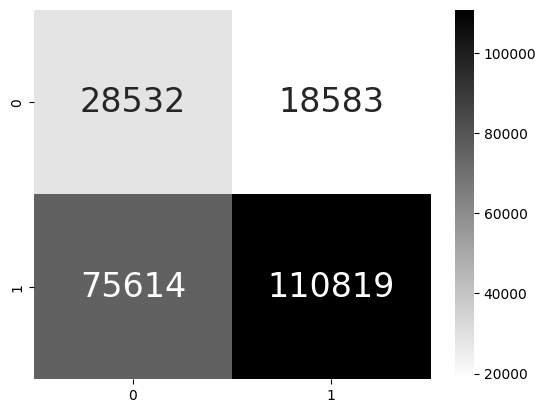

In [53]:
# Using data train model
logistic_regression_model.fit(X_train_prepared, y_train_0)

# Use training set calculate confusion matrix
y_train_predictions = logistic_regression_model.predict(X_train_prepared)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train_0, y_train_predictions)


plt.figure()
sns.heatmap(matrix, annot=True, fmt='d', cmap='binary', annot_kws={"fontsize":24})
plt.show()

In [54]:
# Predicting
y_pred = logistic_regression_model.predict(X_train_prepared)

# Caculate precision recall f1 score
precision = precision_score(y_train_0, y_pred)
recall = recall_score(y_train_0, y_pred)
f1 = f1_score(y_train_0, y_pred)

print(f"Logistic regression Precision: {precision}")
print(f"Logistic regressionRecall: {recall}")
print(f"Logistic regression F1 Score: {f1}")

Logistic regression Precision: 0.8563932551274324
Logistic regressionRecall: 0.5944172973668824
Logistic regression F1 Score: 0.7017524973482989


## Fine tune model (Random Forest)

In [56]:
# parameter_grid = [
#     {
#         'n_estimators': [10, 30, 50],  
#         'max_features': [2, 4, 6, 8],
#         'max_depth': [None, 10, 20, 30],  
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#     }
# ]


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# parameter_grid = [
#     # Try 12 (3×4) combinations of hyperparameters:
#     {'n_estimators': [3, 10, 30], 
#      'max_features': [2, 4, 6, 8]}
# ]

parameter_grid = [
    {
        'n_estimators': [10, 30, 50],  
        'max_features': [2, 4, 6, 8]
        # 'max_depth': [None, 10, 20, 30]
    }
]


forest_classifier = RandomForestClassifier(random_state=5059)


forest_grid_search = GridSearchCV(
    forest_classifier, parameter_grid, cv=3, # Train caross 3 folder
    scoring='recall', 
    return_train_score=True
)

# Fit model
forest_grid_search.fit(X_train_prepared, y_train_0)
print(forest_grid_search.best_estimator_)  


RandomForestClassifier(max_features=4, n_estimators=50, random_state=5059)


In [ ]:
# Results for best model
print(forest_grid_search.best_estimator_)

RandomForestClassifier(max_features=8, n_estimators=30, random_state=5059)


In [ ]:
# Output best sore and their corresponding score
grid_search_results = forest_grid_search.cv_results_
for mean_score, params in zip(
    grid_search_results["mean_test_score"], grid_search_results["params"]):
    print(mean_score), params)

nan {'max_features': 2, 'n_estimators': 3}
nan {'max_features': 2, 'n_estimators': 10}
nan {'max_features': 2, 'n_estimators': 30}
nan {'max_features': 4, 'n_estimators': 3}
nan {'max_features': 4, 'n_estimators': 10}
nan {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}


/tmp/ipykernel_169658/1532212574.py:5: RuntimeWarning: invalid value encountered in sqrt
  print(np.round(np.sqrt(-mean_score)), params)


## Run final model on test set

In [ ]:
# Best parameters from grid search
final_model = forest_grid_search.best_estimator_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Training model
# forest_classifier = RandomForestClassifier(max_features=2, n_estimators=30, random_state=5059)
# forest_classifier.fit(X_train_prepared, y_train)


# Prediction use trained model
y_pred_test = final_model.predict(X_test_prepared)


In [ ]:
# Calculate different score
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test,average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

print("Final model Test set evaluation:")
print(f"Final Accuracy: {accuracy}")
print(f"Final Precision: {precision}")
print(f"Final Recall: {recall}")
print(f"Final F1 Score: {f1}")

Test set evaluation:
Accuracy: 0.7858427389658657
Precision: 0.5565379357940045
Recall: 0.5111595951641379
F1 Score: 0.48292873030233047
